In [1]:
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt
import pandas as pd


# Load the dataset
file_path = "building_violations_2020.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()



,_id,case_no,ap_case_defn_key,status_dttm,status,code,value,description,violation_stno,violation_sthigh,...,contact_addr2,contact_city,contact_state,contact_zip,sam_id,latitude,longitude,location,geom_point_2249,geom_point_4326
0,2439,V484881,1013,2020-12-29 13:25:58,Closed,105.1,NaN,Failure to Obtain Permit,1514R,NaN,...,NaN,South Boston,MA,02127,35081.0,42.330829,-71.040250,"(42.33082949840556, -71.04025046786995)",0101000020C9080000837F603B83D1274176A355FCBE79...,0101000020E61000009CC9B27693C251C01C1AFA9E582A...
1,2440,V537081,1013,2020-12-28 12:25:33,Closed,102.8,NaN,Maintenance,151,NaN,...,NaN,DUXBURY,MA,02332,29134.0,42.360530,-71.070590,"(42.360529535524265, -71.07059046997172)",0101000020C90800007F3ACFB7FE902741F79BC338CD8E...,0101000020E610000005FCE38D84C451C0CE28F2D4252E...
2,2441,V536727,1013,2020-12-28 11:28:28,Closed,102.8,NaN,Maintenance,149,NaN,...,NaN,BROOKLINE,MA,02445-6837,158142.0,42.360479,-71.070570,"(42.36047884838841, -71.07056994227128)",0101000020C90800000255FFFF099127413F710000C48E...,0101000020E6100000B088CA3784C451C02E5DC02B242E...
3,2442,V537066,1013,2020-12-28 10:17:54,Closed,107.4,NaN,Failed to comply w permit term,140,NaN,...,NaN,MATTAPAN,MA,02126,124965.0,42.276320,-71.086571,"(42.27631956643476, -71.08657069413415)",0101000020C908000002F0FE706A702741D9B431C8D252...,0101000020E61000004906CF5F8AC551C0858A86705E23...
4,2443,V536876,1013,2020-12-28 09:47:34,Open,105.1,NaN,Failure to Obtain Permit,1139,NaN,...,NaN,WINCHESTER,MA,01890,37026.0,42.351023,-71.127000,"(42.35102261076987, -71.12699961726828)",0101000020C9080000014AE8E4011A274123D3E717E587...,0101000020E610000065B100C320C851C0E1B4144FEE2C...


In [2]:
df= df[df['violation_city'] != 'HYDE PARK']

Boston_df = df[df['violation_city'] == 'Boston']

# Get unique zip codes from the filtered DataFrame
unique_zip_codes = Boston_df['violation_zip'].unique()

# Add leading zeros to the zip codes
unique_zip_codes_with_zeros = [f"{zip_code:05d}" for zip_code in unique_zip_codes]

# Print the collection of unique zip codes with leading zeros
print(unique_zip_codes_with_zeros)


['02114', '02215', '02108', '02111', '02113', '02116', '02115', '02199', '02109', '02110']


In [3]:
def zip_to_neighborhood(zip):
    if zip == 2114 or zip == 2110:
        return 'Downtown'
    elif zip == 2215 or  zip == 2115:
        return 'Fenway'
    elif zip == 2108:
        return 'Beacon Hill'
    elif zip == 2111:
        return 'Chinatown'
    elif zip == 2113 or zip == 2109:
        return 'North End'
    elif zip == 2116 or zip == 2199:
        return 'Back Bay'

# Apply the function to the 'violation_zip' column for entries with 'violation_city' equal to 'Boston'
df.loc[df['violation_city'] == 'Boston', 'violation_city'] = df[df['violation_city'] == 'Boston']['violation_zip'].apply(zip_to_neighborhood)

In [4]:
# Calculate the total number of violations for each neighborhood
neighborhood_violations = df.groupby('violation_city').size()

# Calculate the total number of violations across all neighborhoods
total_violations = neighborhood_violations.sum()

# Calculate the rate of violations for each neighborhood
violation_rates = neighborhood_violations / total_violations

# Create a new DataFrame to store the results
new_df = pd.DataFrame({'Neighborhood': neighborhood_violations.index, 'Total Violations': neighborhood_violations.values, 'Violation Rate': violation_rates.values})

#new_df = new_df[new_df['Neighborhood'] != 'HYDE PARK']
# Display the new DataFrame
new_df.head(24)

,Neighborhood,Total Violations,Violation Rate
0,Allston,8,0.010944
1,Back Bay,37,0.050616
2,Beacon Hill,12,0.016416
3,Brighton,19,0.025992
4,Charlestown,16,0.021888
5,Chinatown,3,0.004104
6,Dorchester,236,0.322845
7,Downtown,42,0.057456
8,East Boston,52,0.071135
9,Fenway,8,0.010944


In [5]:
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt
import pandas as pd


# Load the dataset
file_path2 = "census.csv"
census_df = pd.read_csv(file_path2)

# Display the first few rows of the dataset
census_df.head(30)

,tract20_nbhd,P0020001,P0020005,P0020006,P0020002,P002aapi,P002others,P0040001,P0040005,P0040006,...,P0050005,P0050006,P0050007,P0050008,P0050009,P0050010,H0010001,H0010002,H0010003,hhsize
0,field concept,Total:,White alone,Black or African American alone,Hispanic or Latino,"Asian, Native Hawaiian and Pacific Islander al...","Other Races or Multiple Races, all ages",Total:,White alone,Black or African American alone,...,Nursing facilities/Skilled-nursing facilities,Other institutional facilities,Noninstitutionalized population:,College/University student housing,Military quarters,Other noninstitutional facilities,Total:,Occupied,Vacant,household size
1,Allston,24904,12536,1326,3259,6271,1512,23140,11976,1184,...,0,0,3281,3214,0,67,10748,10027,721,2.156477511
2,Back Bay,18190,13065,690,1208,2410,817,17042,12349,641,...,269,0,1610,1487,0,123,11524,10006,1518,1.630121927
3,Beacon Hill,9336,7521,252,537,630,396,8603,6980,231,...,0,0,33,0,0,33,6037,5485,552,1.696080219
4,Brighton,52047,32694,2414,5376,8703,2860,47657,30752,2076,...,266,56,3796,3493,0,303,23653,22535,1118,2.126292434
5,Charlestown,19120,13626,990,2075,1650,779,15661,11689,662,...,55,0,55,0,30,25,9525,8932,593,2.128302732
6,Chinatown,6211,1844,254,451,3480,182,5477,1741,216,...,0,0,446,443,0,3,3272,2937,335,1.9628873
7,Dorchester,122191,27411,42714,25285,13360,13421,95365,24327,32678,...,291,0,936,0,0,936,47965,44823,3142,2.692323138
8,Downtown,13768,8730,569,967,3018,484,12975,8340,559,...,321,0,4124,3283,0,841,6604,5384,1220,1.731612184
9,East Boston,43066,15760,1403,21700,1932,2271,34826,14039,1136,...,132,0,109,0,0,109,18016,16695,1321,2.564420485


In [6]:
# Merge the violation data with the census data on the neighborhood columns
merged_df = df.merge(census_df, left_on='violation_city', right_on='tract20_nbhd', how='left')

# Convert 'P0020001' column to numeric
merged_df['P0020001'] = pd.to_numeric(merged_df['P0020001'], errors='coerce')

# Calculate the total number of violations for each neighborhood
neighborhood_violations = merged_df.groupby('violation_city').size()

# Calculate the total number of houses for each neighborhood
total_houses = merged_df.groupby('violation_city')['P0020001'].first()

# Calculate the violation rate for each neighborhood
violation_rates = neighborhood_violations / total_houses

# Create a new DataFrame to store the results
Rates_df = pd.DataFrame({
    'Neighborhood': neighborhood_violations.index,
    'Total Violations': neighborhood_violations.values,
    'Total Houses': total_houses.values,
    'Violation Rate': violation_rates.values
})

# Display the new DataFrame
print(Rates_df)

     Neighborhood  Total Violations  Total Houses  Violation Rate
0         Allston                 8         24904        0.000321
1        Back Bay                37         18190        0.002034
2     Beacon Hill                12          9336        0.001285
3        Brighton                19         52047        0.000365
4     Charlestown                16         19120        0.000837
5       Chinatown                 3          6211        0.000483
6      Dorchester               236        122191        0.001931
7        Downtown                42         13768        0.003051
8     East Boston                52         43066        0.001207
9          Fenway                 8         37493        0.000213
10      Hyde Park                38         34172        0.001112
11  Jamaica Plain                17         40015        0.000425
12       Mattapan                45         23840        0.001888
13   Mission Hill                 5         17518        0.000285
14      No

In [7]:
# Sort the DataFrame by 'Violation Rate' column in descending order
sorted_df = Rates_df.sort_values(by='Violation Rate', ascending=False)

# Select the top 5 rows
top_5_rates = sorted_df.head(5)

# Print the top 5 rates
print(top_5_rates)

   Neighborhood  Total Violations  Total Houses  Violation Rate
7      Downtown                42         13768        0.003051
14    North End                23         10805        0.002129
1      Back Bay                37         18190        0.002034
6    Dorchester               236        122191        0.001931
12     Mattapan                45         23840        0.001888


In [8]:
# Calculate the total number of violations for each neighborhood
neighborhood_violations = merged_df.groupby('violation_city').size()

# Convert 'P0020001' column to numeric
merged_df['H0010002'] = pd.to_numeric(merged_df['H0010002'], errors='coerce')

# Calculate the total number of houses for each neighborhood
total_houses = merged_df.groupby('violation_city')['H0010002'].first()

# Calculate the violation rate for each neighborhood
violation_rates = (neighborhood_violations / total_houses ) *100

# Create a new DataFrame to store the results
Rates2_df = pd.DataFrame({
    'Neighborhood': neighborhood_violations.index,
    #'Total Violations': neighborhood_violations.values,
    #'Total Houses': total_houses.values,
    'Violation Rate': violation_rates.values
})

# Display the new DataFrame
print(Rates2_df)

     Neighborhood  Violation Rate
0         Allston        0.079785
1        Back Bay        0.369778
2     Beacon Hill        0.218778
3        Brighton        0.084313
4     Charlestown        0.179131
5       Chinatown        0.102145
6      Dorchester        0.526515
7        Downtown        0.780089
8     East Boston        0.311471
9          Fenway        0.060273
10      Hyde Park        0.304707
11  Jamaica Plain        0.097701
12       Mattapan        0.510088
13   Mission Hill        0.074985
14      North End        0.364270
15     Roslindale        0.196884
16        Roxbury        0.459426
17   South Boston        0.217137
18   West Roxbury        0.119492


In [9]:
# Sort the DataFrame by 'Violation Rate' column in descending order
sorted_df = Rates2_df.sort_values(by='Violation Rate', ascending=False)

# Select the top 5 rows
top_5_rates = sorted_df.head(5)

# Print the top 5 rates
print(top_5_rates)

   Neighborhood  Violation Rate
7      Downtown        0.780089
6    Dorchester        0.526515
12     Mattapan        0.510088
16      Roxbury        0.459426
1      Back Bay        0.369778


In [10]:
file_path3 = "SAM.csv"
SAM = pd.read_csv(file_path3)

file_path2 = "PA_2020.csv"
P_Assesment = pd.read_csv(file_path2)

merged_data_intermediete = pd.merge(merged_df, SAM, left_on='sam_id', right_on='SAM_ADDRESS_ID', how='inner')
merged_data = pd.merge(merged_data_intermediete, P_Assesment, left_on='PARCEL', right_on='PID', how='inner')

merged_data.head()

/Users/john/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (8,9,24,25,26) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Users/john/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (6,15,27,28,29,34,35,36,37,38,39,40,41,42,44,45,46,47,48,58,59,64,65,66,67,68,69,70,72,73,74) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Users/john/opt/anaconda3/lib/python3.8/site-packages/pandas/core/reshape/merge.py:1112: RuntimeWarning: invalid value encountered in cast
  if not (lk == lk.astype(rk.dtype))[~np.isnan(lk)].all():


,_id,case_no,ap_case_defn_key,status_dttm,status,code,value,description,violation_stno,violation_sthigh,...,U_BTH_STYLE2,U_BTH_STYLE3,U_KITCH_TYPE,U_KITCH_STYLE,U_HEAT_TYP,U_AC,U_FPLACE,U_INT_FIN,U_INT_CND,U_VIEW
0,2442,V537066,1013,2020-12-28 10:17:54,Closed,107.4,NaN,Failed to comply w permit term,140,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2445,V536868,1013,2020-12-24 10:24:57,Closed,102.8,NaN,Maintenance,85,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2447,V536627,1013,2020-12-22 14:53:15,Open,105.1,NaN,Failure to Obtain Permit,111,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2449,V536457,1013,2020-12-21 13:34:33,Closed,1001.3.2,NaN,Testing & Certification,70,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2450,V536455,1013,2020-12-21 13:16:08,Closed,105.1,NaN,Failure to Obtain Permit,62,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Group by neighborhood and calculate the average year_built
average_year_built_by_neighborhood = merged_data.groupby('violation_city')['YR_BUILT'].mean()

# Create a new DataFrame to store the results
average_year_built_df = pd.DataFrame({
    'Neighborhood': average_year_built_by_neighborhood.index,
    'Average Year Built': average_year_built_by_neighborhood.values
})

# Display the new DataFrame
print(average_year_built_df)

     Neighborhood  Average Year Built
0         Allston         1932.500000
1        Back Bay         1906.538462
2     Beacon Hill         1922.200000
3        Brighton         1914.625000
4     Charlestown         1887.700000
5       Chinatown         1959.500000
6      Dorchester         1912.305085
7        Downtown         1915.409091
8     East Boston         1911.483871
9          Fenway         1931.500000
10      Hyde Park         1927.416667
11  Jamaica Plain         1910.666667
12       Mattapan         1926.720000
13   Mission Hill         1910.000000
14      North End         1913.357143
15     Roslindale         1920.800000
16        Roxbury         1902.488889
17   South Boston         1899.714286
18   West Roxbury         1915.600000


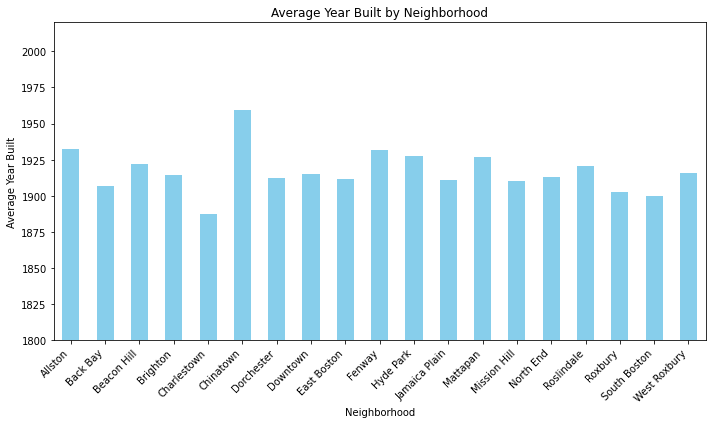

In [12]:
import matplotlib.pyplot as plt

# Group by neighborhood and calculate the average year_built
average_year_built_by_neighborhood = merged_data.groupby('violation_city')['YR_BUILT'].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
average_year_built_by_neighborhood.plot(kind='bar', color='skyblue')
plt.ylim(1800, 2020)
plt.title('Average Year Built by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Average Year Built')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.gca().set_facecolor('none')
plt.gcf().set_facecolor('none')
plt.show()

In [13]:
def get_median_income(zip_code):
    if zip_code == '2108':
        return 151793
    elif zip_code == '2109':
        return 156351
    elif zip_code == '2110':
        return 123942
    elif zip_code == '2111':
        return 65587
    elif zip_code == '2113':
        return 100613
    elif zip_code == '2114':
        return 118125
    elif zip_code == '2115':
        return 47486
    elif zip_code == '2116':
        return 121967
    elif zip_code == '2118':
        return 71096
    elif zip_code == '2119':
        return 34987
    elif zip_code == '2120':
        return 50728
    elif zip_code == '2121':
        return 40732
    elif zip_code == '2122':
        return 77081
    elif zip_code == '2124':
        return 65683
    elif zip_code == '2125':
        return 60612
    elif zip_code == '2126':
        return 61180
    elif zip_code == '2127':
        return 131782
    elif zip_code == '2128':
        return 71630
    elif zip_code == '2129':
        return 140534
    elif zip_code == '2130':
        return 106153
    elif zip_code == '2131':
        return 93601
    elif zip_code == '2132':
        return 114596
    elif zip_code == '2134':
        return 70021
    elif zip_code == '2135':
        return 85792
    elif zip_code == '2136':
        return 81859
    elif zip_code == '2210':
        return 160000
    elif zip_code == '2215':
        return 58466
    elif zip_code == '2163':
        return 67292
    elif zip_code == '2199':
        return 106182
    elif zip_code == '2467':
        return 157054


In [14]:
# Add 'Median Income' column to the merged_df DataFrame
merged_df['Median Income'] = merged_df['violation_zip'].apply(lambda x: get_median_income(str(x)))

# Print all unique median incomes
unique_median_incomes = merged_df['Median Income'].unique()
print("Unique Median Incomes:")
print(unique_median_incomes)

Unique Median Incomes:
[131782 118125  61180  70021  71096  58466  40732 140534  77081  34987
  60612 151793  71630  65587 100613 106153  81859  85792 114596  93601
 121967  65683  47486 106182 156351  50728 123942]


In [15]:
# Group by neighborhood and calculate the average median income
average_median_income_by_neighborhood = merged_df.groupby('violation_city')['Median Income'].mean()

# Create a new DataFrame to store the results
average_median_income_df = pd.DataFrame({
    'Neighborhood': average_median_income_by_neighborhood.index,
    'Average Median Income': average_median_income_by_neighborhood.values
})

# Display the new DataFrame
print("\nAverage Median Income by Neighborhood:")
print(average_median_income_df)


Average Median Income by Neighborhood:
     Neighborhood  Average Median Income
0         Allston           71992.375000
1        Back Bay          121540.378378
2     Beacon Hill          151793.000000
3        Brighton           85792.000000
4     Charlestown          140534.000000
5       Chinatown           65587.000000
6      Dorchester           55257.042373
7        Downtown          118402.000000
8     East Boston           71630.000000
9          Fenway           48858.500000
10      Hyde Park           81859.000000
11  Jamaica Plain          106153.000000
12       Mattapan           61280.066667
13   Mission Hill           50728.000000
14      North End          129693.695652
15     Roslindale           93601.000000
16        Roxbury           44799.228261
17   South Boston          131782.000000
18   West Roxbury          114596.000000


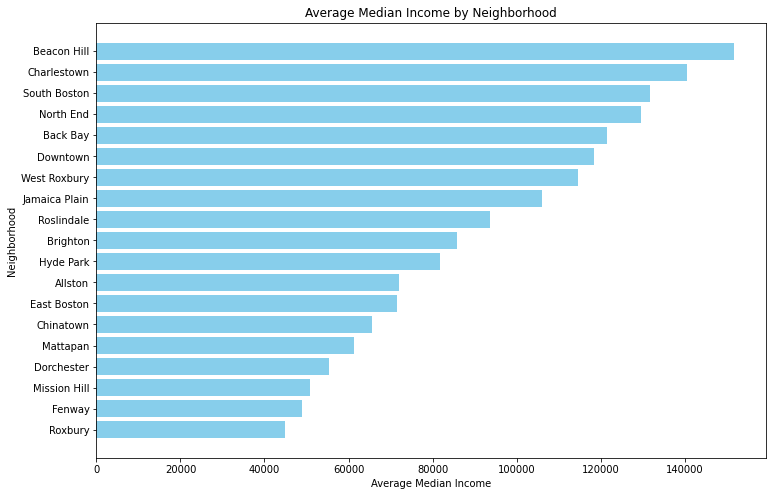

In [16]:
import matplotlib.pyplot as plt

# Sort the DataFrame by average median income
average_median_income_df_sorted = average_median_income_df.sort_values(by='Average Median Income', ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
plt.barh(average_median_income_df_sorted['Neighborhood'], average_median_income_df_sorted['Average Median Income'], color='skyblue')
plt.xlabel('Average Median Income')
plt.ylabel('Neighborhood')
plt.title('Average Median Income by Neighborhood')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest income at the top
plt.gca().set_facecolor('none')
plt.gcf().set_facecolor('none')
plt.savefig('transparent_background_chart.png', transparent=True)
plt.show()